In [69]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df1 = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/Disposable_income_adj.csv', na_values=['NA'])
df1

,Geography,Category,Data Type,Unit,Currency Conversion,Current Constant,2011,2012,2013,2014,2015,2016,2017
0,Azerbaijan,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"12,100.4","13,387.7","15,171.3","16,581.1","17,582.4","19,983.5","23,225.3"
1,Bangladesh,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"68,540.6","78,411.0","88,036.1","98,314.5","110,726.9","123,994.2","140,115.3"
2,Cambodia,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"10,895.1","11,462.9","12,178.9","13,208.8","14,245.7","15,621.0","16,650.9"
3,China,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"3,881,003.1","4,352,694.4","4,824,248.7","5,274,231.8","5,715,663.3","6,227,634.1","6,905,378.4"
4,"Hong Kong, China",Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"197,233.6","210,413.9","225,046.0","238,473.1","251,846.5","259,548.5","279,337.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Spain,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"736,907.0","698,018.0","695,391.3","696,649.0","724,290.1","743,436.6","765,902.1"
99,Sweden,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"168,949.0","176,216.4","181,210.1","187,513.0","194,344.1","202,993.2","211,414.4"
100,Switzerland,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"410,435.0","416,011.6","425,268.0","429,824.9","429,682.3","434,565.4","435,272.0"
101,Turkey,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"40,401.6","44,848.7","52,616.2","59,424.4","67,770.2","75,273.9","89,600.5"


In [3]:
df2 = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/values_long_format.csv', na_values=['NA'])
df2

,Country,2017,2015,2013,2011,region
0,Australia,540,579,743,763,AP
1,Bangladesh,226,236,197,147,AP
2,Brunel,18,19,13,25,AP
3,China,"6,842","8,657","8,767","8,902",AP
4,Hong Kong,277,320,316,232,AP
...,...,...,...,...,...,...
111,Portugal,137,145,180,245,WE
112,Spain,859,913,"1,044","1,216",WE
113,Sweden,260,288,397,461,WE
114,Switzerland,399,448,469,514,WE


In [4]:
# Fix dataframe in df1
df1.rename(columns={'Geography':'Country'}, inplace= True)
numeric_columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
df1[numeric_columns] = df1[numeric_columns].replace({',': ''}, regex=True).astype(float)

In [70]:
# Fix dataframe in df2
df2['Country'].replace({'United States': 'USA'}, inplace=True)
df2.replace({np.nan: "NA"}, inplace=True)
numeric_columns = ['2011', '2013', '2015', '2017']
df2[numeric_columns] = df2[numeric_columns].replace({',': ''}, regex=True).astype(float)
df2.rename(columns={"region":"Region"}, inplace=True)

# Part 1
- generate new dataframe from df1 and df2 as df1_complete and df2_complete then merge them together for part 1 analysis

In [5]:
# New dataframe to work on from df1
df1["Income"] = df1.iloc[:, 6:13].mean(axis=1).round(2)
df1_comp = df1.iloc[:, [0,13]]
df1_comp

,Country,Income
0,Azerbaijan,16861.67
1,Bangladesh,101162.66
2,Cambodia,13466.19
3,China,5311550.54
4,"Hong Kong, China",237414.16
...,...,...
98,Spain,722942.01
99,Sweden,188948.60
100,Switzerland,425865.60
101,Turkey,61419.36


In [37]:
# New dataframe to work on from df2
df2["Loss"] = df2.iloc[:, 1:4].mean(axis=1).round(2)
df2_comp = df2.iloc[:, [0,5,6]]
df2_comp

,Country,Region,Loss
0,Australia,AP,620.67
1,Bangladesh,AP,219.67
2,Brunel,AP,16.67
3,China,AP,8088.67
4,Hong Kong,AP,304.33
...,...,...,...
111,Portugal,WE,154.00
112,Spain,WE,938.67
113,Sweden,WE,315.00
114,Switzerland,WE,438.67


In [38]:
# Merge df1_complete and df2_complete
m_df = pd.merge(df2_comp,df1_comp, on="Country")
m_df

,Country,Region,Loss,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
2,China,AP,8088.67,5311550.54
3,India,AP,2689.67,1209014.89
4,Indonesia,AP,1234.33,436347.99
...,...,...,...,...
82,Portugal,WE,154.00,133555.91
83,Spain,WE,938.67,722942.01
84,Sweden,WE,315.00,188948.60
85,Switzerland,WE,438.67,425865.60


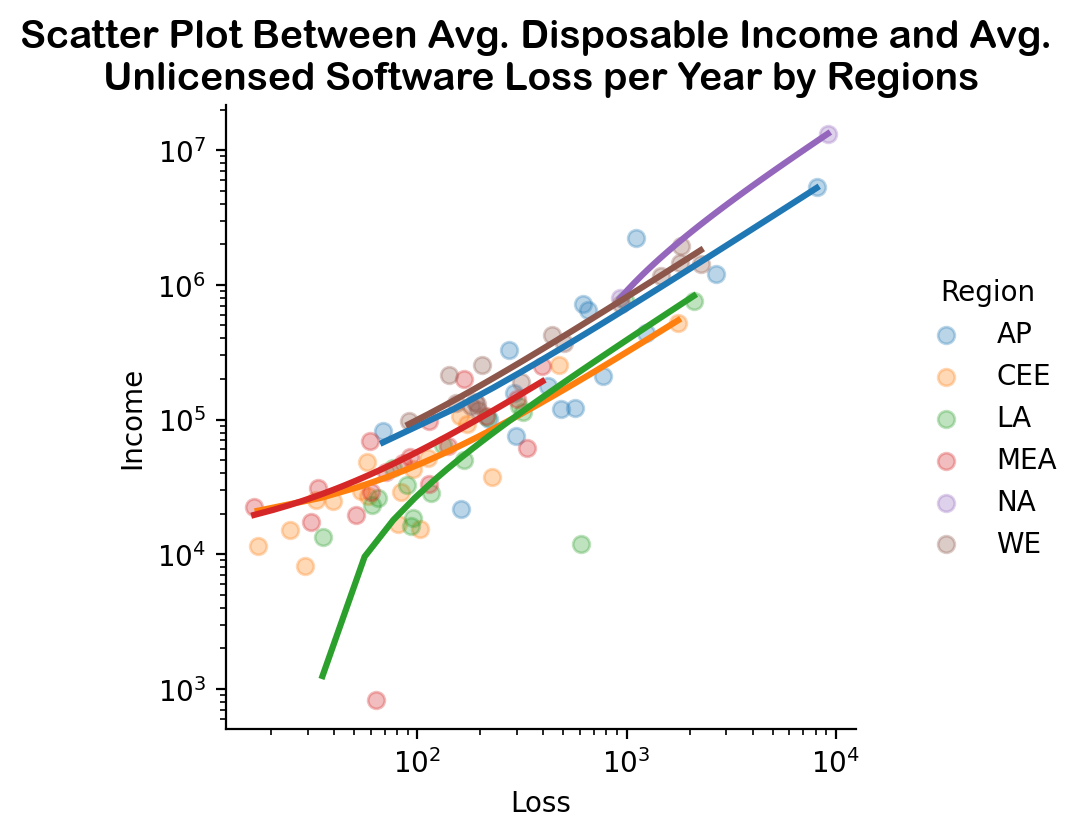

In [40]:
# Scatter Plot show correlation
grid = sns.lmplot(x="Loss", y="Income", data=m_df, hue="Region", height=4, aspect=1,
           scatter_kws={'alpha':.3}, ci=False)
grid.set(xscale="log", yscale="log")
plt.title("Scatter Plot Between Avg. Disposable Income and Avg. \nUnlicensed Software Loss per Year by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');

In [41]:
# Exclude NA and China
df3 = m_df[m_df["Region"] != "NA"][m_df["Country"] != "China"]
df3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_24580\461500541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = m_df[m_df["Region"] != "NA"][m_df["Country"] != "China"]


,Country,Region,Loss,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
3,India,AP,2689.67,1209014.89
4,Indonesia,AP,1234.33,436347.99
5,Japan,AP,1108.33,2246537.51


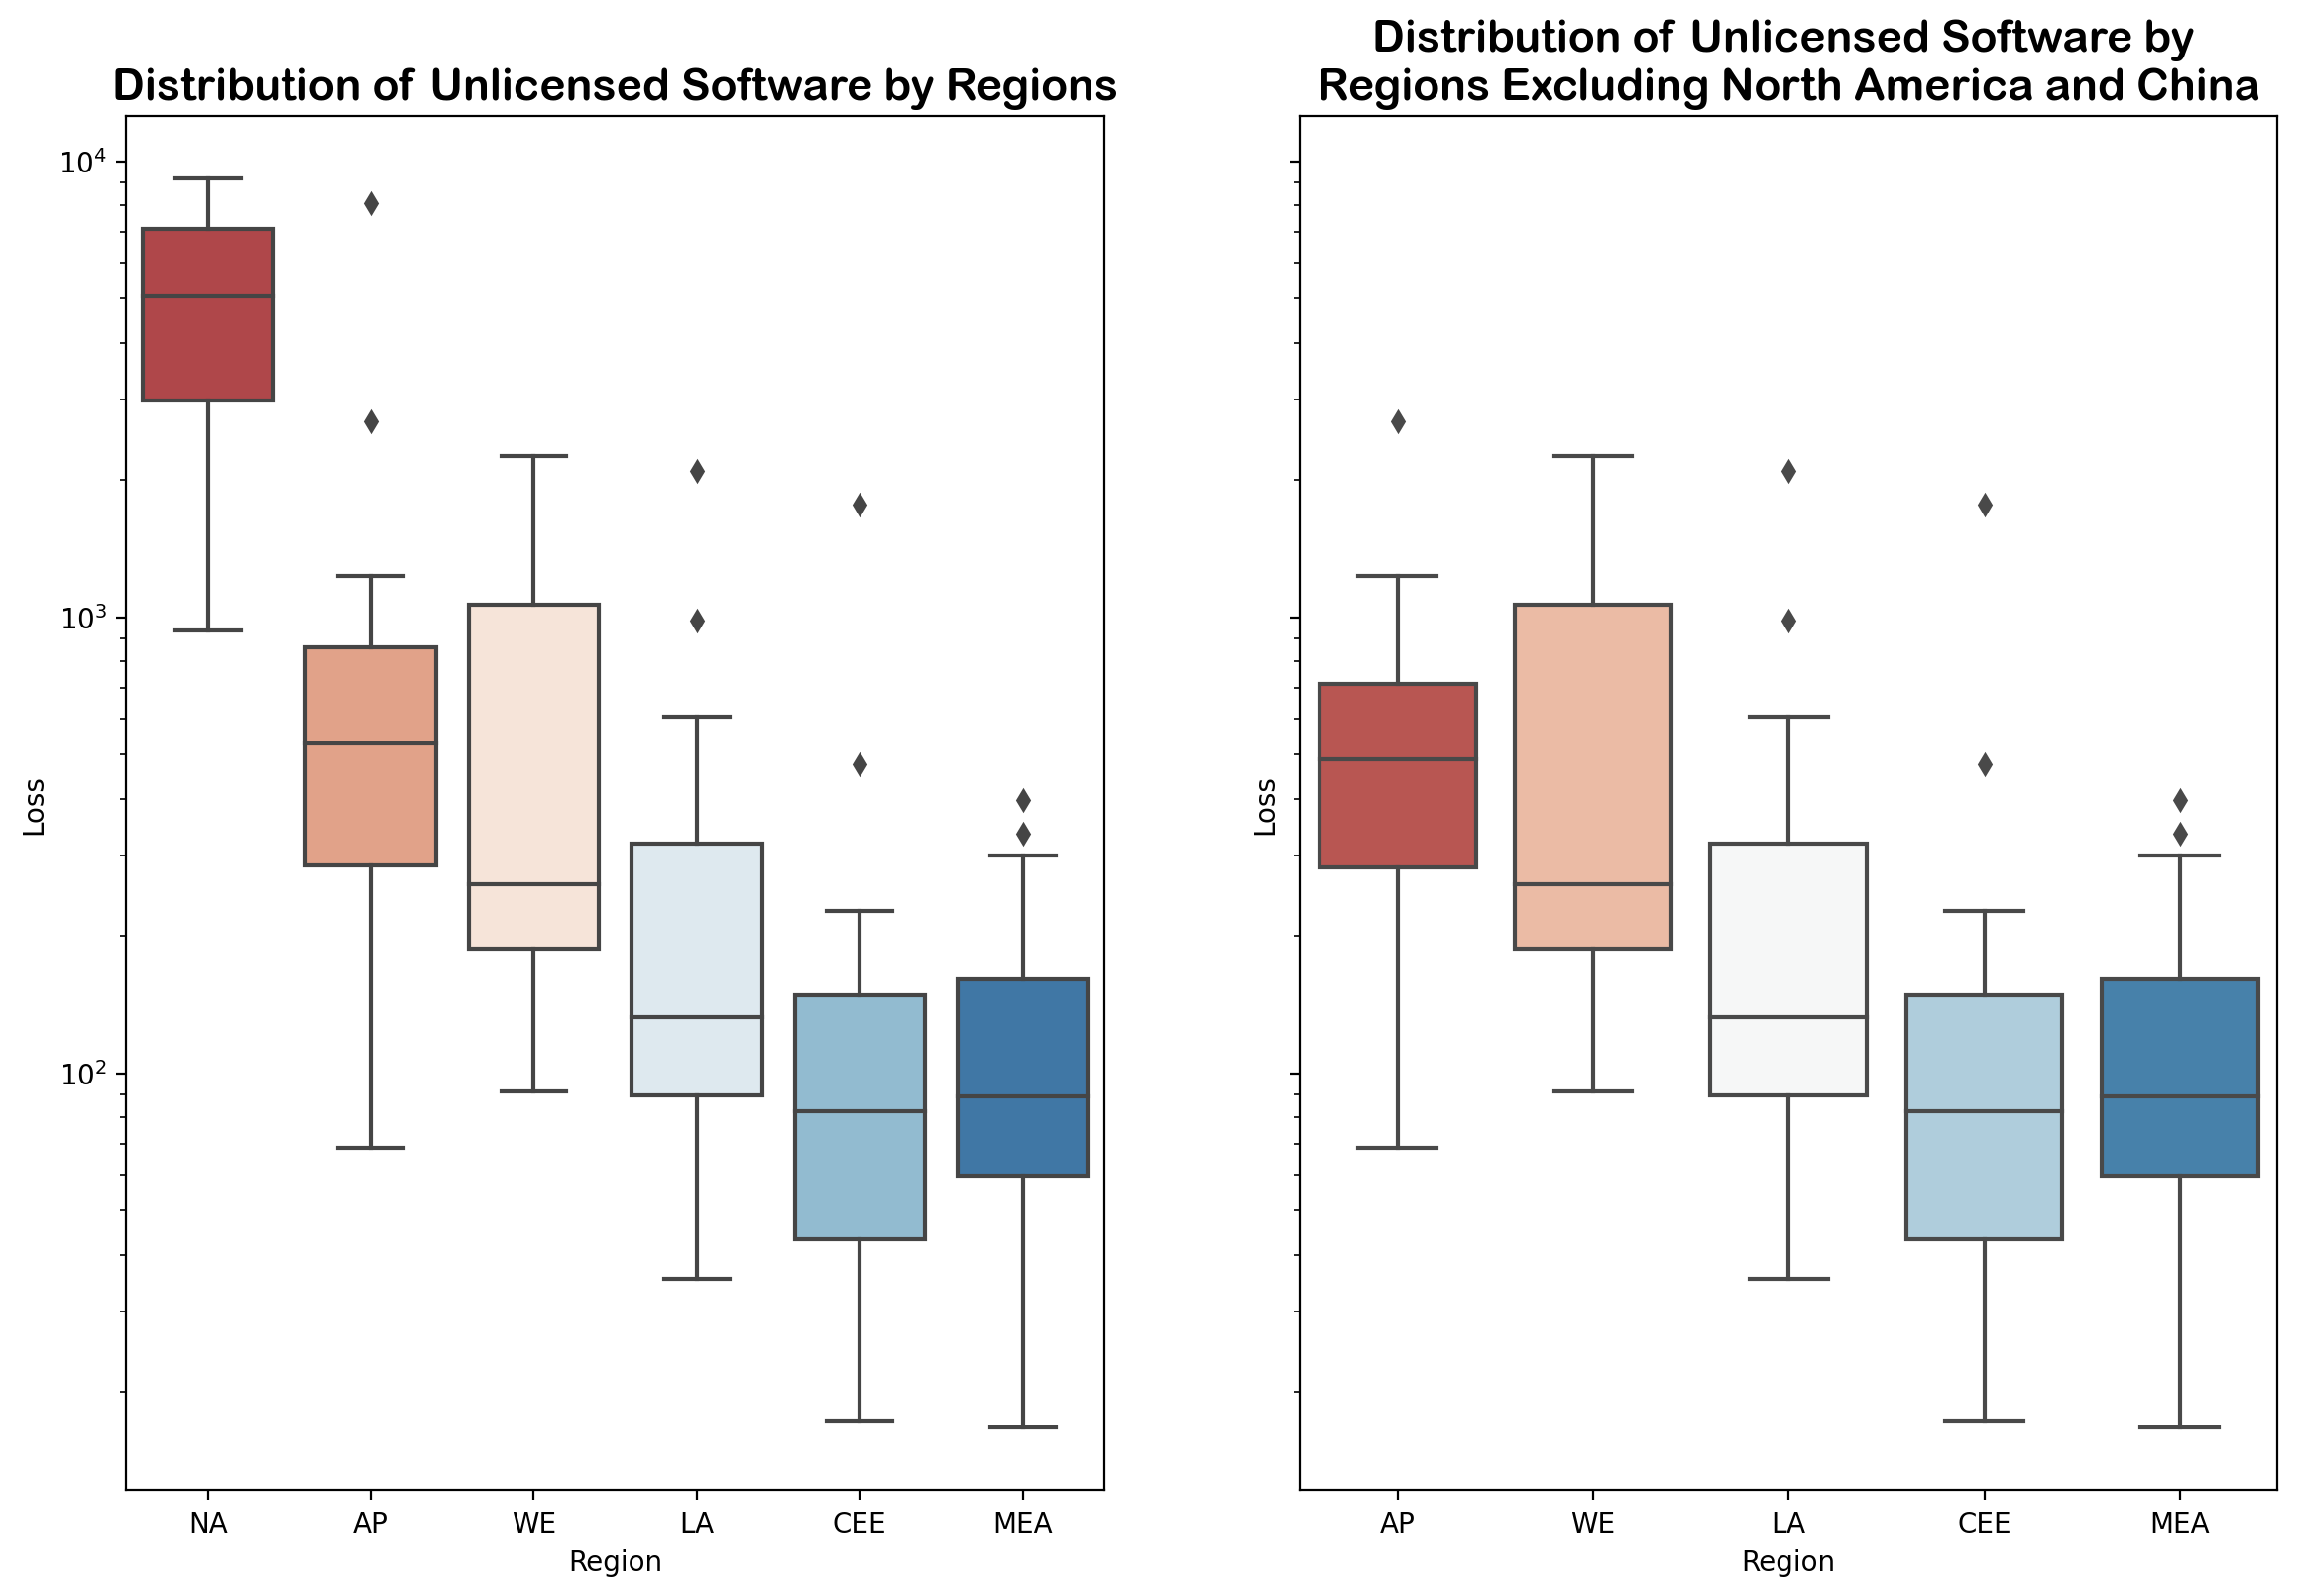

In [43]:
# Box plot show outliner
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharey=True)
x_axis, y_axis = "Region", "Loss"

grid2 = sns.boxplot(x=x_axis, y=y_axis, data=m_df.sort_values(["Loss"], ascending=False), ax=ax[0], palette="RdBu")
grid2.set(yscale="log")
ax[0].set_title("Distribution of Unlicensed Software by Regions", 
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.boxplot(x=x_axis, y=y_axis, data=df3.sort_values(["Loss"], ascending=False), ax=ax[1], palette="RdBu")
ax[1].set_title("Distribution of Unlicensed Software by \nRegions Excluding North America and China", 
                fontsize=16, fontname='Arial Rounded MT Bold');

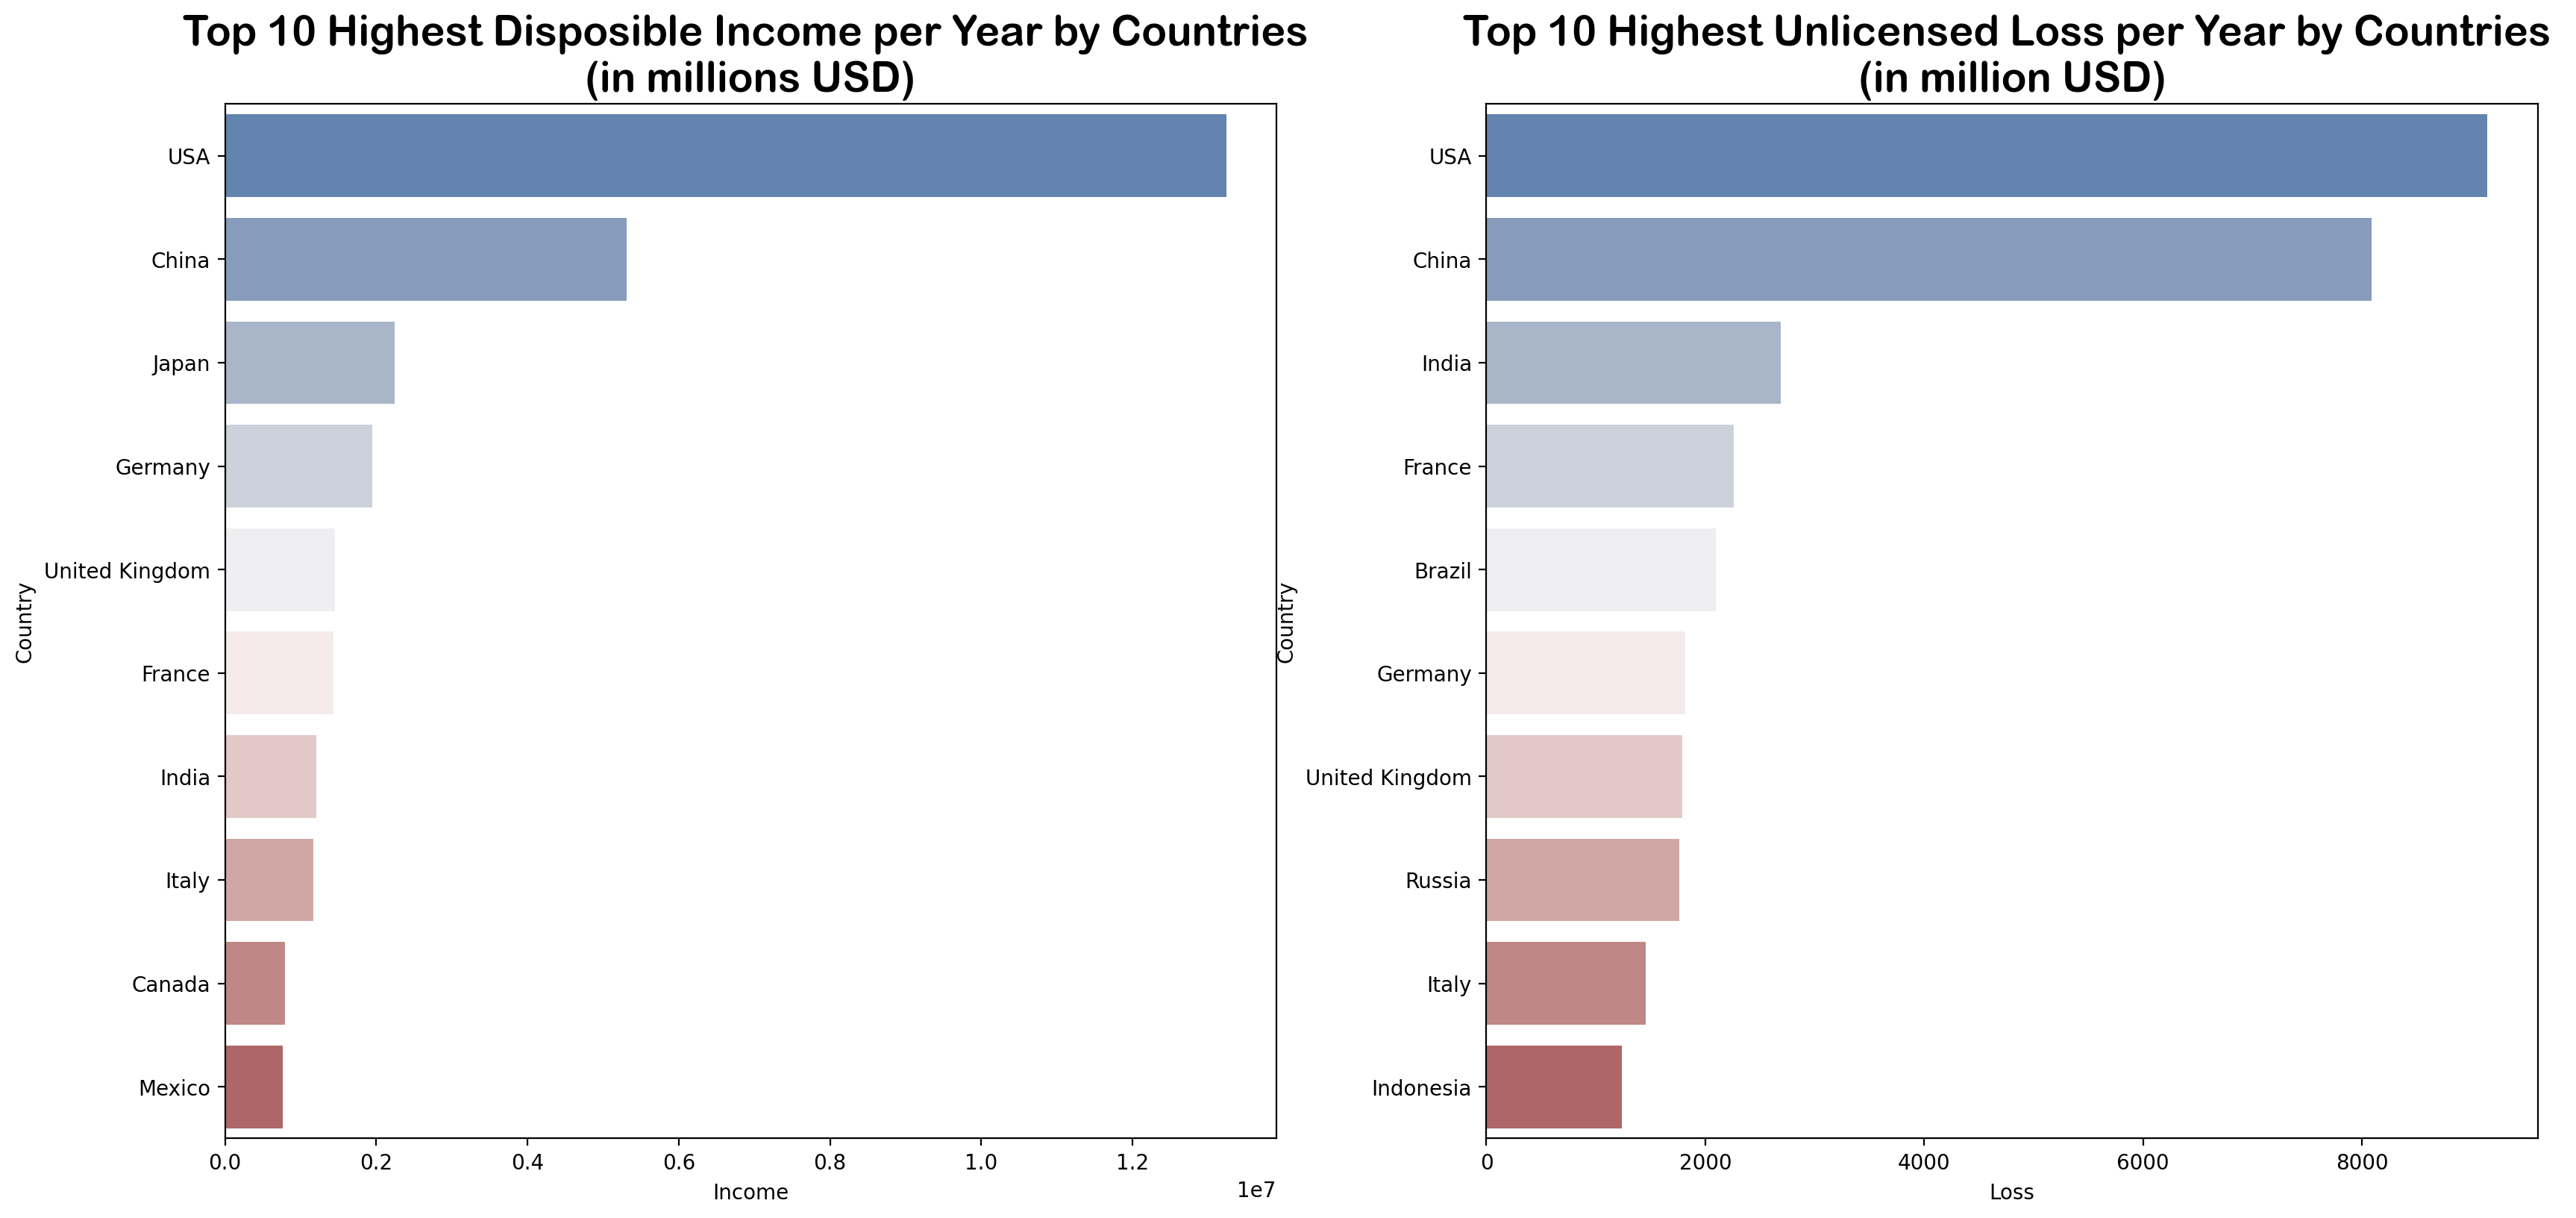

In [46]:
# Highest income & Loss by country
fig, ax = plt.subplots(1, 2, figsize=(20,9))
y_axis = "Country"

grid2 = sns.barplot(x="Income", y=y_axis, data=m_df.sort_values("Income", ascending=False).head(10), ax=ax[0], palette="vlag")
ax[0].set_title("Top 10 Highest Disposible Income per Year by Countries \n(in millions USD)",
                fontsize=20, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x="Loss", y=y_axis, data=m_df.sort_values("Loss", ascending=False).head(10), ax=ax[1], palette="vlag")
ax[1].set_title("Top 10 Highest Unlicensed Loss per Year by Countries \n(in million USD)",
                fontsize=20, fontname='Arial Rounded MT Bold');

C:\Users\User\AppData\Local\Temp\ipykernel_24580\3843641712.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid2 = sns.barplot(x=x_axis, y="Income", data=m_df.sort_values("Income",
C:\Users\User\AppData\Local\Temp\ipykernel_24580\3843641712.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid3 = sns.barplot(x=x_axis, y="Loss", data=m_df.sort_values("Income",


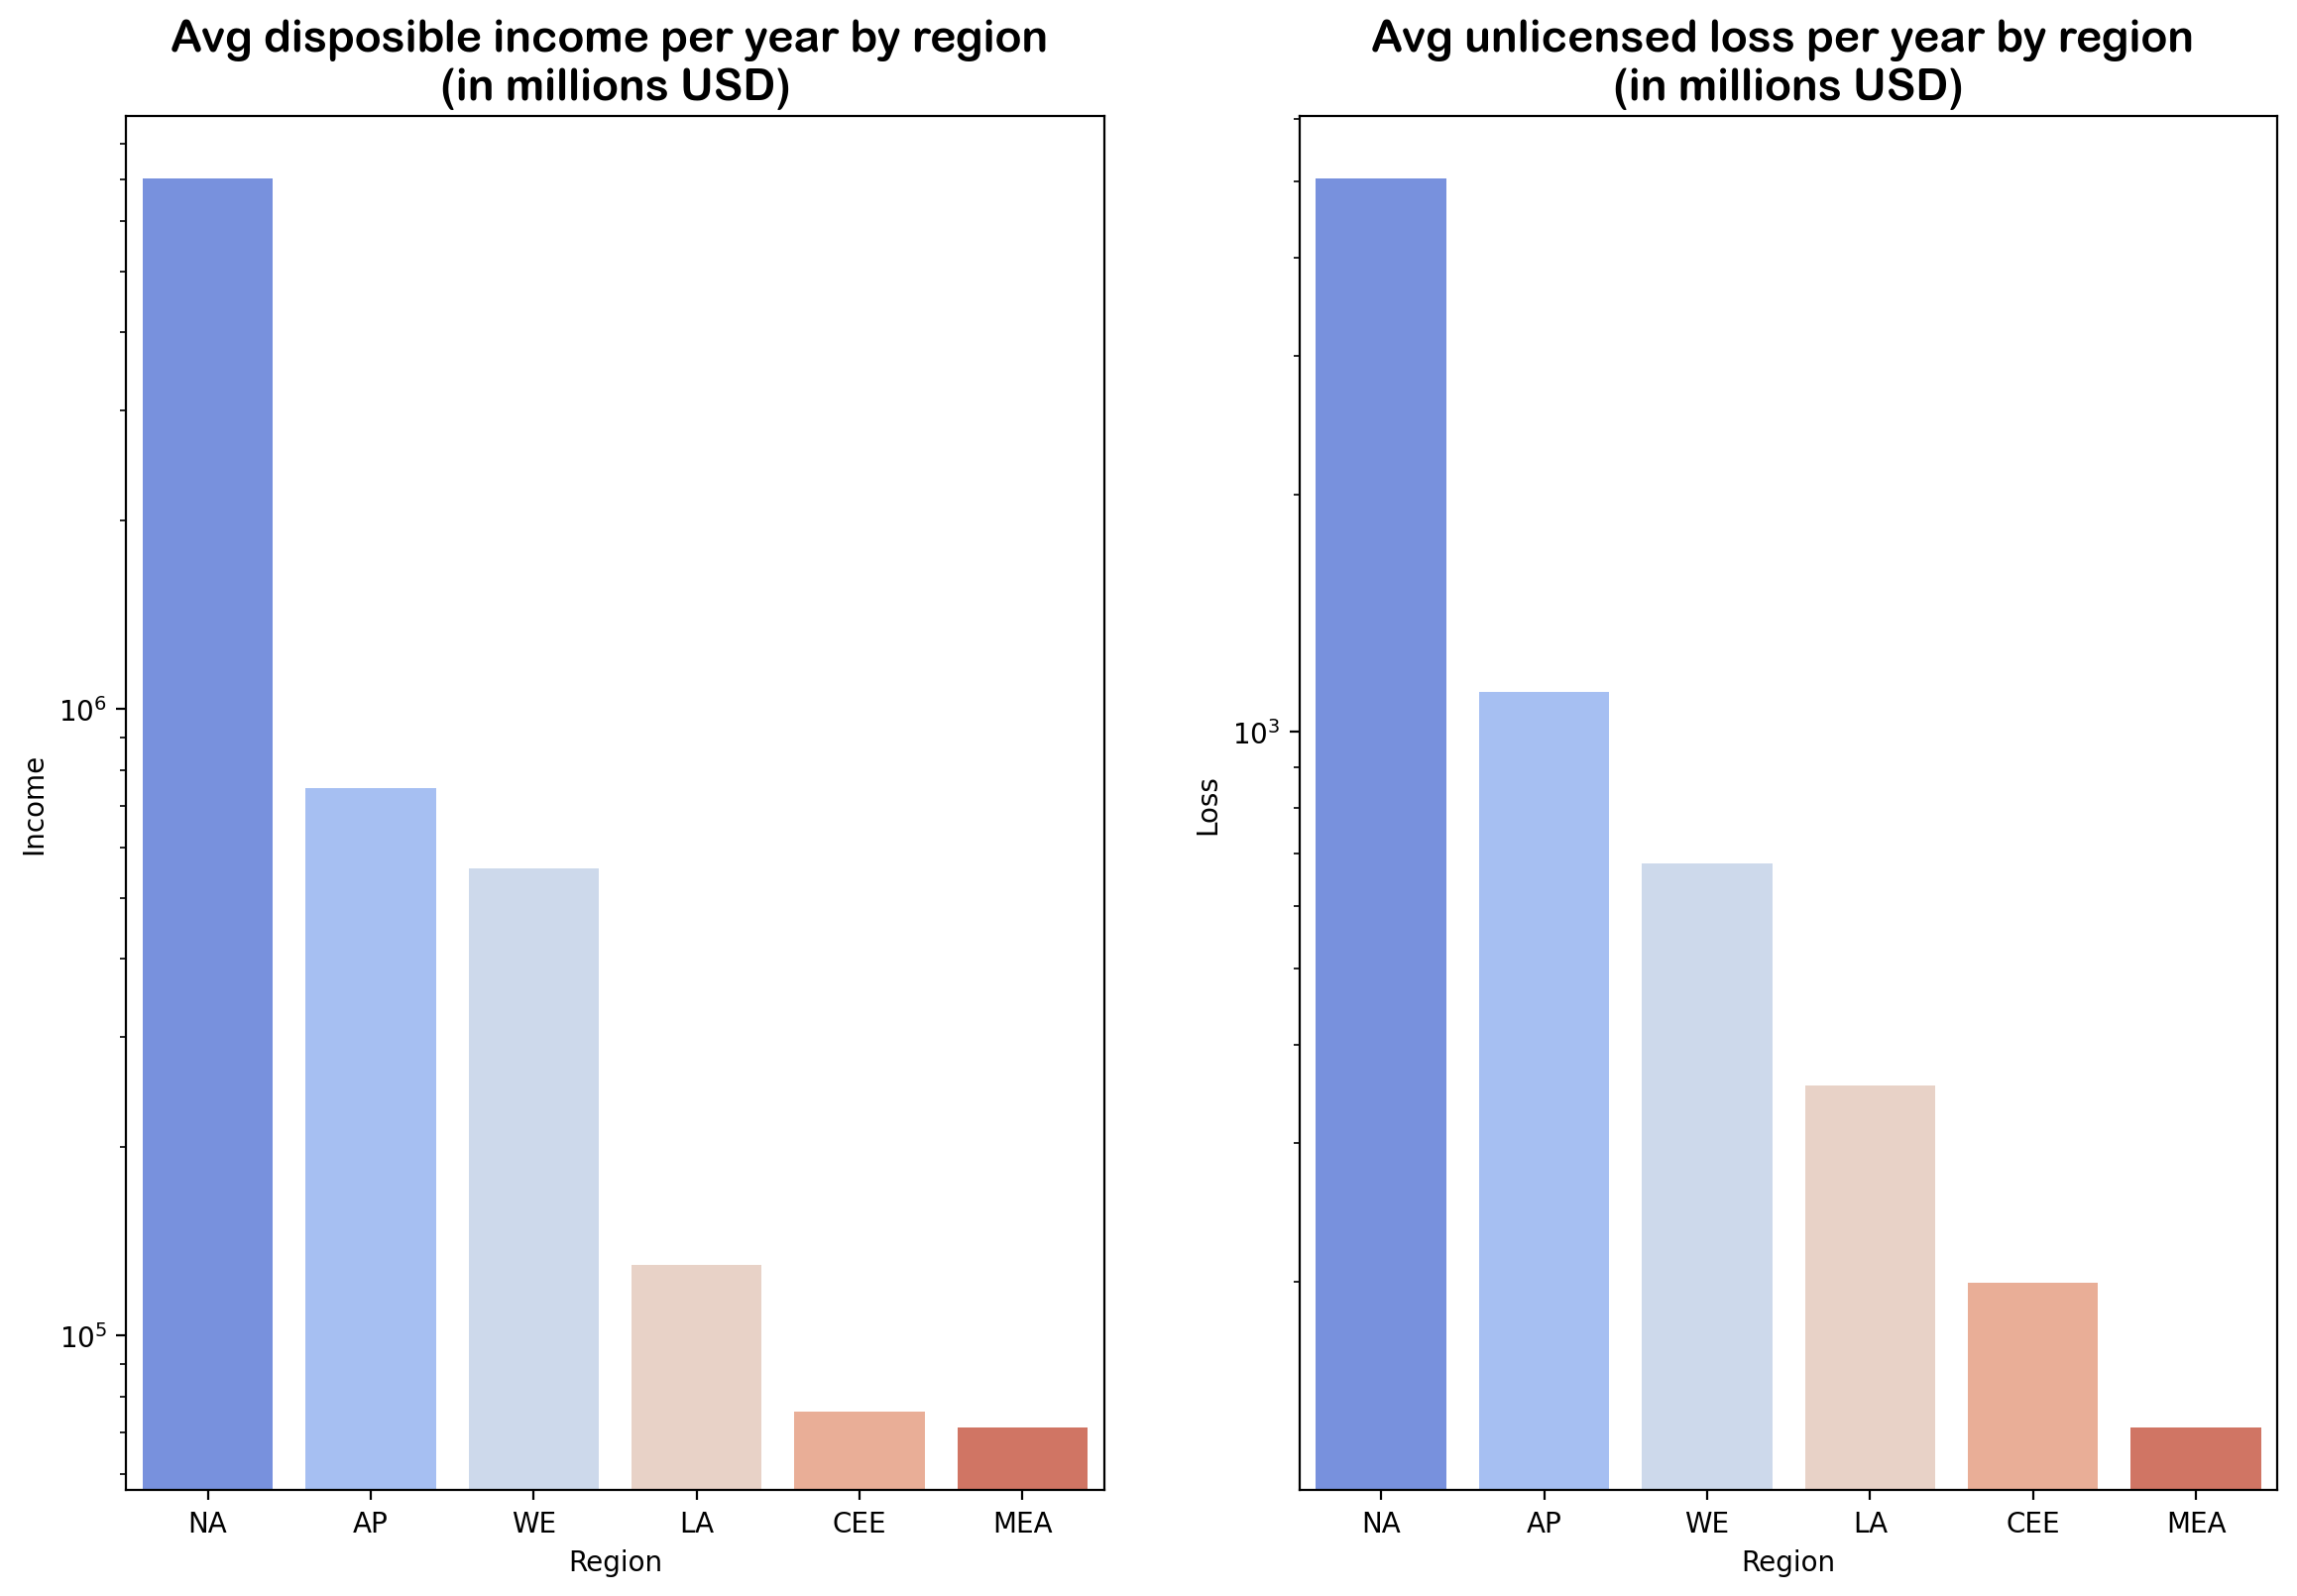

In [47]:
# Highest income & Lost by region
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid2 = sns.barplot(x=x_axis, y="Income", data=m_df.sort_values("Income", 
        ascending=False), ax=ax[0], ci=None, palette="coolwarm")
ax[0].set_title("Avg disposible income per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x=x_axis, y="Loss", data=m_df.sort_values("Income",
        ascending=False), ax=ax[1], ci=None, palette="coolwarm")
ax[1].set_title("Avg unlicensed loss per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid2.set(yscale="log")
grid3.set(yscale="log");

# Part 2
- generate new dataframe from df1 and df2 as df1_complete2 and df2_complete2 then merge them together for part 2 analysis

In [62]:
# New dataframe to work on from df1
df1_comp2 = df1.iloc[:, [0,6,12]]
df1_comp2 = pd.melt(df1_comp2, id_vars='Country', var_name='Year', value_name='Income')
df1_comp2.sort_values(["Country","Year"])

,Country,Year,Income
59,Algeria,2011,34467.4
162,Algeria,2017,60716.2
60,Angola,2011,5785.3
163,Angola,2017,18746.6
42,Argentina,2011,4650.9
...,...,...,...
123,Uzbekistan,2017,18425.8
58,Venezuela,2011,0.0
161,Venezuela,2017,0.0
21,Vietnam,2011,86910.7


In [63]:
# New dataframe to work on from df2
df2_comp2 = df2.iloc[:, [0,1,4,5]]
df2_comp2 = pd.melt(df2_comp2, id_vars=['Country','Region'], var_name='Year', value_name='Loss')
df2_comp2.sort_values(["Country","Year"])

,Country,Region,Year,Loss
135,Albania,CEE,2011,6.0
19,Albania,CEE,2017,10.0
179,Algeria,MEA,2011,83.0
63,Algeria,MEA,2017,70.0
160,Argentina,LA,2011,657.0
...,...,...,...,...
88,Yemen,MEA,2017,10.0
205,Zambia,MEA,2011,3.0
89,Zambia,MEA,2017,4.0
206,Zimbabwe,MEA,2011,4.0


In [64]:
# merged 2 dataframes to get m_df2
m_df2 = pd.merge(df2_comp2,df1_comp2, on=["Country", "Year"])
m_df2.sort_values(["Country","Year"])

,Country,Region,Year,Loss,Income
138,Algeria,MEA,2011,83.0,34467.4
51,Algeria,MEA,2017,70.0,60716.2
121,Argentina,LA,2011,657.0,4650.9
34,Argentina,LA,2017,308.0,23968.3
87,Australia,AP,2011,763.0,639048.1
...,...,...,...,...,...
49,Uruguay,LA,2017,51.0,30275.1
137,Venezuela,LA,2011,668.0,0.0
50,Venezuela,LA,2017,317.0,0.0
102,Vietnam,AP,2011,395.0,86910.7


In [65]:
# Year 2011
m_df2011 = m_df2[m_df2["Year"] == "2011"].iloc[:, 1:5]
m_df2011

,Region,Year,Loss,Income
87,AP,2011,763.0,639048.1
88,AP,2011,147.0,68540.6
89,AP,2011,8902.0,3881003.1
90,AP,2011,2930.0,851639.2
91,AP,2011,1467.0,314017.4
...,...,...,...,...
169,WE,2011,245.0,133801.9
170,WE,2011,1216.0,736907.0
171,WE,2011,461.0,168949.0
172,WE,2011,514.0,410435.0


In [66]:
# Year 2017
m_df2017 = m_df2[m_df2["Year"] == "2017"].iloc[:, 1:5]
m_df2017

,Region,Year,Loss,Income
0,AP,2017,540.0,790413.8
1,AP,2017,226.0,140115.3
2,AP,2017,6842.0,6905378.4
3,AP,2017,2474.0,1608509.7
4,AP,2017,1095.0,564981.9
...,...,...,...,...
82,WE,2017,137.0,142274.3
83,WE,2017,859.0,765902.1
84,WE,2017,260.0,211414.4
85,WE,2017,399.0,435272.0


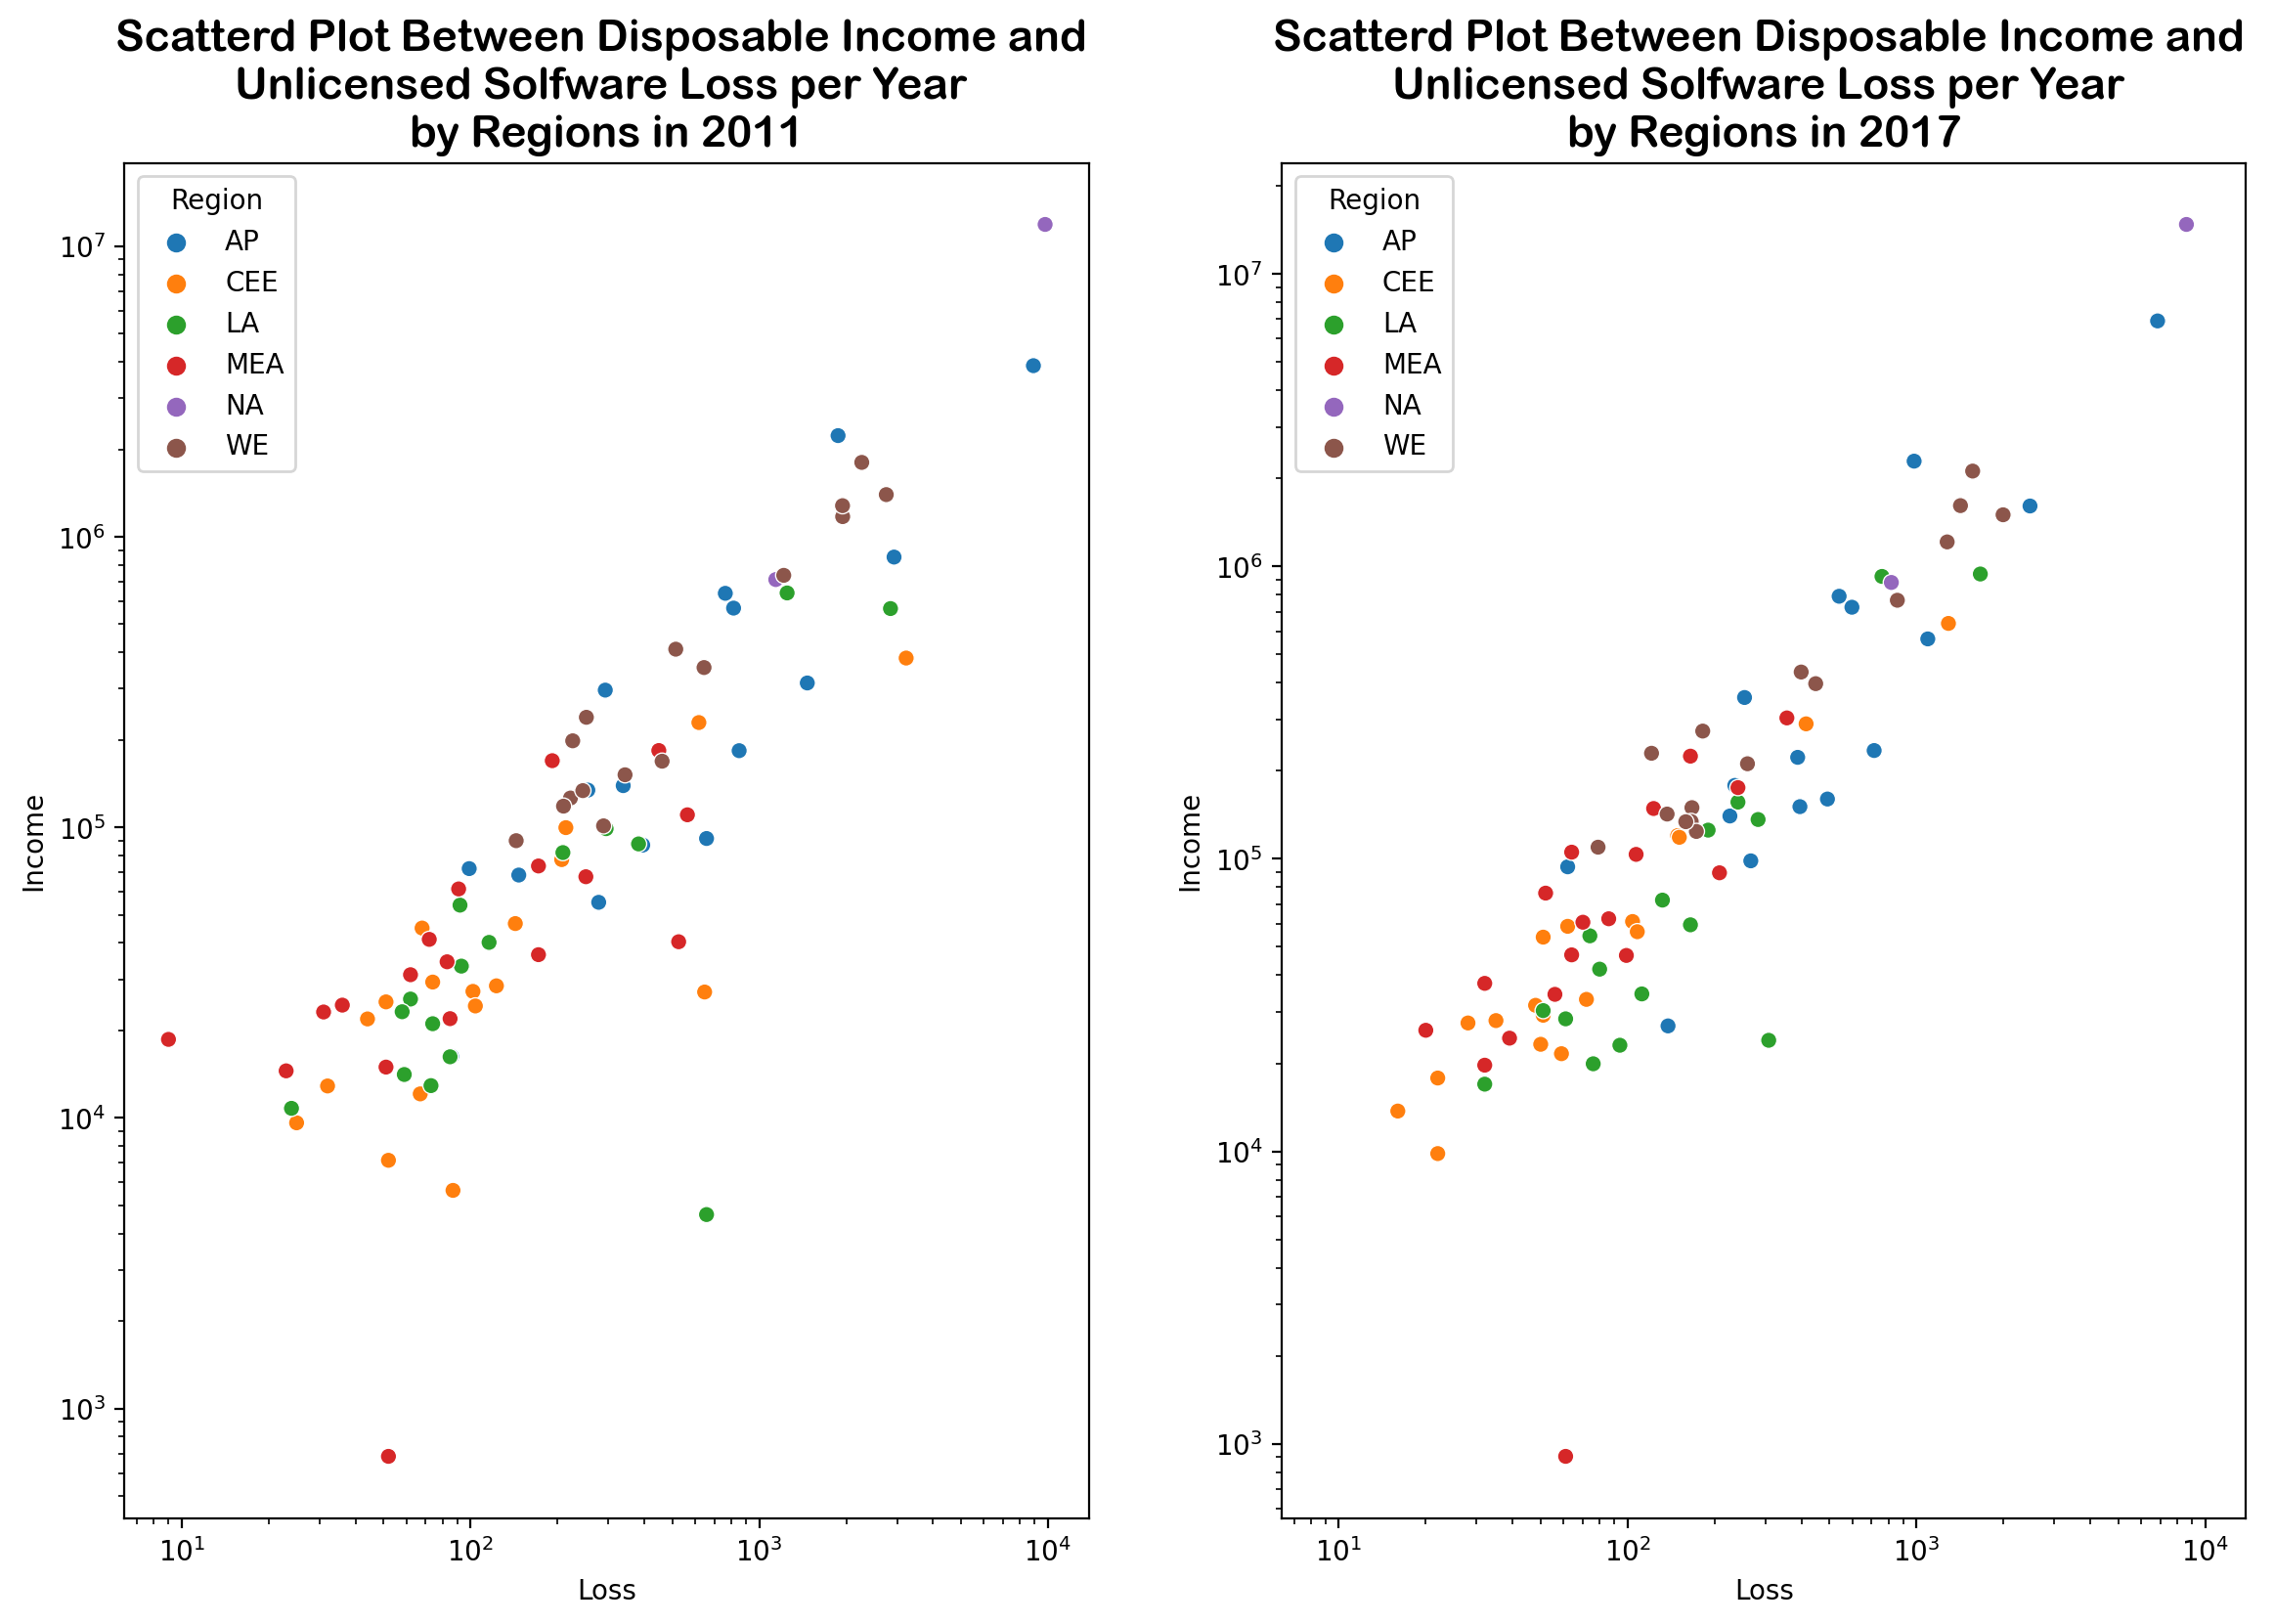

In [72]:
# Scatter 2 years compared
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharex=True)
x_axis, y_axis = "Loss", "Income"

grid1 = sns.scatterplot(x=x_axis, y=y_axis, data=m_df2011, hue="Region", ax=ax[0])
ax[0].set_title("Scatterd Plot Between Disposable Income and \nUnlicensed Solfware Loss per Year \nby Regions in 2011",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid2 = sns.scatterplot(x=x_axis, y=y_axis, data=m_df2017, hue="Region", ax=ax[1])
ax[1].set_title("Scatterd Plot Between Disposable Income and \nUnlicensed Solfware Loss per Year \nby Regions in 2017",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid1.set(yscale="log", xscale="log")
grid2.set(yscale="log", xscale="log");